# Decision Trees

## ACM SIGKDD Austin Chapter

### Carlos Santillan


Sample Decision Trees with Scikit-Learn


### Import

Load the required components. 

Note that this notebook requires the installation of graphviz http://www.graphviz.org/ 
and pydotplus https://pypi.python.org/pypi/pydotplus in order to see a visualization of the Decision tree 

In [1]:
from __future__ import print_function

import os
from IPython.display import Image  
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import  cross_val_score
from sklearn import tree
from sklearn.externals.six import StringIO  
import pydotplus


## Exploration

Using the Iris Dataset where each row in the database (or CSV file) is a set of measurements of an individual iris flower. Each sample in this dataset is described by 4 features and can belong to one of the target classes:

Features in the Iris dataset:
 	
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

Target classes to predict:
 	
* 0: Iris Setosa
* 1: Iris Versicolour
* 2: Iris Virginica


Load the data



In [2]:
raw_dir = os.path.join(os.getcwd(), os.pardir, "data/raw/")
irisdf = pd.read_csv(raw_dir+"newiris.csv",index_col=0)

print("* irisdf.head()", irisdf.head(10), sep="\n", end="\n\n")
print("* irisdf.tail()", irisdf.tail(10), sep="\n", end="\n\n")

* irisdf.head()
    SepalLength  SepalWidth  PetalLength  PetalWidth         Name  Target
id                                                                       
0           5.1         3.5          1.4         0.2  Iris-setosa       0
1           4.9         3.0          1.4         0.2  Iris-setosa       0
2           4.7         3.2          1.3         0.2  Iris-setosa       0
3           4.6         3.1          1.5         0.2  Iris-setosa       0
4           5.0         3.6          1.4         0.2  Iris-setosa       0
5           5.4         3.9          1.7         0.4  Iris-setosa       0
6           4.6         3.4          1.4         0.3  Iris-setosa       0
7           5.0         3.4          1.5         0.2  Iris-setosa       0
8           4.4         2.9          1.4         0.2  Iris-setosa       0
9           4.9         3.1          1.5         0.1  Iris-setosa       0

* irisdf.tail()
     SepalLength  SepalWidth  PetalLength  PetalWidth            Name  Target
i

In [3]:
print("* iris types:", irisdf["Name"].unique(), sep="\n")

* iris types:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
features = list(irisdf.columns[:4])
print("* features:", features, sep="\n")

* features:
['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']


In [5]:
y = irisdf["Target"]
X = irisdf[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print ("* Training sample size : ", len(X_train))
print ("* Validation sample size : ", len(X_test))

* Training sample size :  120
* Validation sample size :  30


Building the Decision Tree. 
For full usage of Decision Tree Classifier refer to scikit-learn api http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


Tunable parameters:

* criterion : 'gini' or 'entropy' default 'gini'
* min_samples_split : The minimum number of samples required to split an internal node.
* random_state : seed to use for random number generator
* max_depth : The maximum depth of the tree


In [6]:
dt = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=5, random_state=1024)
dt.fit(X_train, y_train)
#dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1024, splitter='best')

## Calculate the scores 

Score against the training set

In [7]:
def printScores(amodel, xtrain,ytrain,xtest,ytest):
    tscores = amodel.score( xtrain, ytrain)
    vscores = amodel.score( xtest, ytest)
    print ("Training score is %f" % tscores)
    print ("Validation score is %f" % vscores)
    print ("Model depth is %i" % amodel.tree_.max_depth )


printScores(dt,X_train,y_train, X_test,y_test)

Training score is 0.983333
Validation score is 1.000000
Model depth is 5


Score against the Test Set

## Visualize Decision Tree

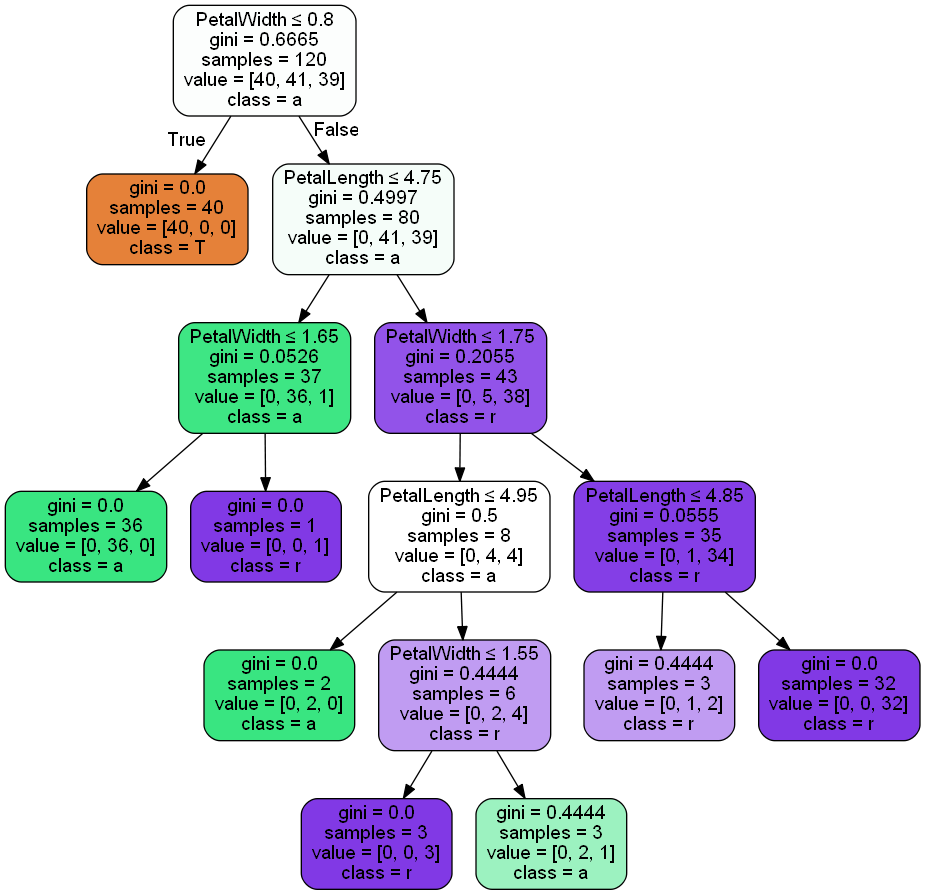

In [8]:
dot_data = StringIO()  
tree.export_graphviz(dt, out_file=dot_data,  
                     feature_names=features,  
                     class_names='Target',  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



In [9]:
dt = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=30,  random_state=1024)
dt.fit(X, y)
scores = cross_val_score(dt, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

dt = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=5, random_state=1024)
dt.fit(X, y)
scores = cross_val_score(dt, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.96 (+/- 0.07)
Accuracy: 0.96 (+/- 0.07)



# Understanding Decision Trees
http://chrisstrelioff.ws/sandbox/2015/06/25/decision_trees_in_python_again_cross_validation.html



In [10]:
def get_code(tree, feature_names, target_names,
             spacer_base="    "):
    """Produce pseudo-code for decision tree.

    Args
    ----
    tree -- scikit-leant Decision Tree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse (left, right, threshold, features,
                             left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse (left, right, threshold, features,
                             right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)

get_code(dt,features,"Target")

if ( PetalWidth <= 0.800000011921 ) {
    return T ( 50 examples )
}
else {
    if ( PetalWidth <= 1.75 ) {
        if ( PetalLength <= 4.94999980927 ) {
            if ( PetalWidth <= 1.65000009537 ) {
                return a ( 47 examples )
            }
            else {
                return r ( 1 examples )
            }
        }
        else {
            if ( PetalWidth <= 1.54999995232 ) {
                return r ( 3 examples )
            }
            else {
                return a ( 2 examples )
                return r ( 1 examples )
            }
        }
    }
    else {
        if ( PetalLength <= 4.85000038147 ) {
            return a ( 1 examples )
            return r ( 2 examples )
        }
        else {
            return r ( 43 examples )
        }
    }
}


# Feature Importance


The feature importances. The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance





In [11]:
def listFeatureImportance(amodel, features):
    ### Extract feature importance
    ## based from 
    ## http://stackoverflow.com/questions/34239355/feature-importance-extraction-of-decision-trees-scikit-learn

    importances = amodel.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print('Feature Ranking:')

    for f in range(len(features)):
        if importances[indices[f]] > 0:
            print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
            print ("\tfeature name: ", features[indices[f]])
            
listFeatureImportance(dt, features)
            

Feature Ranking:
1. feature 3 (0.932367)
	feature name:  PetalWidth
2. feature 2 (0.067633)
	feature name:  PetalLength
